## Praktikum 1 : Pre-Processing

### ~ Import Library

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

### ~ Menampilkan Data Dari CSV

In [ ]:
data = pd.read_csv('/content/iris.csv')
data.head(150)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


### ~ Menampilkan tipe data masing-masing attribute

In [ ]:
print(data.dtypes)
print(data.shape)

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object
(149, 5)


### ~ Menghitung jumlah attributes dan instances Data

In [ ]:
print(data.shape)

(149, 5)


### ~ Menambahkan nama header pada data

In [ ]:
nama_kolom = ['sepal length (cm)', 'sepal width in (cm)', 'petal length in (cm)', 'petal width in (cm)', 'class']
newdata = pd.read_csv('iris.csv', header=None, names=nama_kolom)
newdata.head(10)

,sepal length (cm),sepal width in (cm),petal length in (cm),petal width in (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### ~ Mengatur Nilai Atribut Target (Class) Agar Menjadi Nilai Angka (Permisalan Encode)

In [ ]:
clear = newdata['class'].unique()
pemetaan = {nilai: urutan for urutan, nilai in enumerate(clear, start=1)}
newdata['class'] = newdata['class'].map(pemetaan)

newdata.head(10)

,sepal length (cm),sepal width in (cm),petal length in (cm),petal width in (cm),class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


### ~ Melihat Statistik Data

In [ ]:
newdata.describe()

,sepal length (cm),sepal width in (cm),petal length in (cm),petal width in (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


## 1. Penanganan Data Duplikat



In [ ]:
print(newdata.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [ ]:
print(newdata[newdata.duplicated(keep=False)])

     sepal length (cm)  sepal width in (cm)  petal length in (cm)  \
9                  4.9                  3.1                   1.5   
34                 4.9                  3.1                   1.5   
37                 4.9                  3.1                   1.5   
101                5.8                  2.7                   5.1   
142                5.8                  2.7                   5.1   

     petal width in (cm)  class  
9                    0.1      1  
34                   0.1      1  
37                   0.1      1  
101                  1.9      3  
142                  1.9      3  


In [ ]:
clear = newdata.drop_duplicates(keep="last")
clear.head()

,sepal length (cm),sepal width in (cm),petal length in (cm),petal width in (cm),class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
print(newdata[newdata.duplicated(keep=False)])

     sepal length (cm)  sepal width in (cm)  petal length in (cm)  \
9                  4.9                  3.1                   1.5   
34                 4.9                  3.1                   1.5   
37                 4.9                  3.1                   1.5   
101                5.8                  2.7                   5.1   
142                5.8                  2.7                   5.1   

     petal width in (cm)  class  
9                    0.1      1  
34                   0.1      1  
37                   0.1      1  
101                  1.9      3  
142                  1.9      3  


## 2. Penanganan Data Hilang (missing value)

In [ ]:
cek_value = newdata.isnull().sum()
cek_value

sepal length (cm)       0
sepal width in (cm)     0
petal length in (cm)    0
petal width in (cm)     0
class                   0
dtype: int64

## 3. Pemilihan Fitur/Atribut penting

In [ ]:
X = newdata.drop(columns='class')
Y = newdata['class']

- Pemisahan Fitur

In [ ]:
X.head()

,sepal length (cm),sepal width in (cm),petal length in (cm),petal width in (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- Pemisahan Atribute Penting Target (Type)

In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

- Seleksi Fitur

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Contoh dengan SelectKBest dan f-score
selector = SelectKBest(score_func=f_classif, k=3)  # Pilih 3 fitur terbaik
X_new = selector.fit_transform(X, Y)

In [ ]:
#Membuat data frame untuk feature yang sudah dipilih
new_x = pd.DataFrame(X_new)
new_x.head()

,0,1,2
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


## 4.Standarisasi

In [ ]:
nama_kolom = ['sepal length (cm)', 'sepal width in (cm)', 'petal length in (cm)', 'petal width in (cm)']

scaler = StandardScaler()
standard = scaler.fit_transform(X)

standard_data = pd.DataFrame(standard, columns = nama_kolom)
standard_data.head()

,sepal length (cm),sepal width in (cm),petal length in (cm),petal width in (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


- Visualisasi Data Setelah di Standarisasi

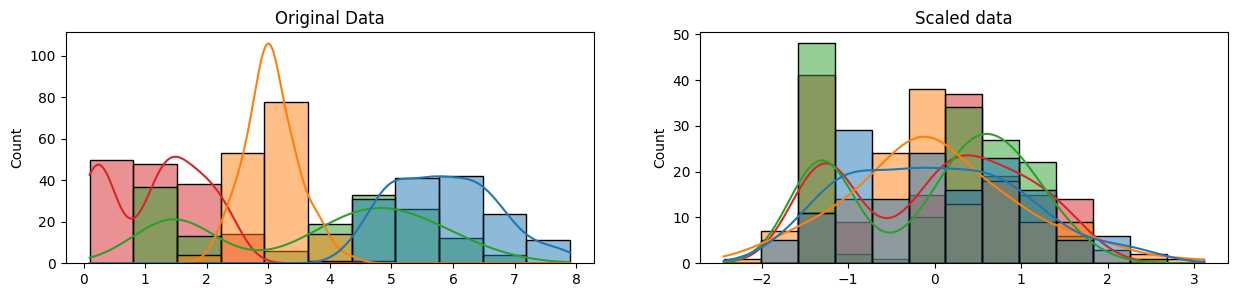

In [ ]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(X, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(standard_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

## 5. Reduksi dimensi data

In [ ]:
from sklearn.decomposition import PCA

n_components = 3  # Ganti dengan jumlah komponen yang diinginkan
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(standard_data)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.72770452 0.23030523 0.03683832]


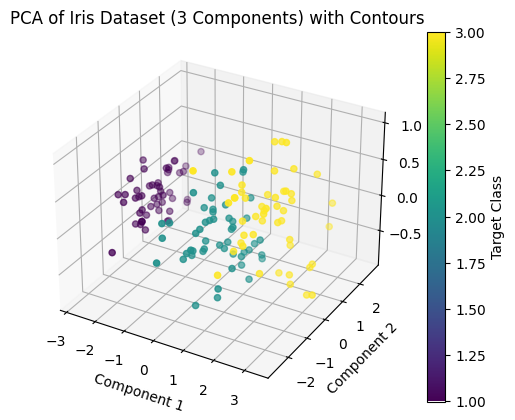

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Membuat scatter plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Menggunakan komponen utama sebagai koordinat x, y, dan z
x = X_pca[:, 0]
y = X_pca[:, 1]
z = X_pca[:, 2]

# Plot data dengan menggunakan target (Y) sebagai warna
scatter = ax.scatter(x, y, z, c=Y, cmap='viridis')
plt.colorbar(scatter, label='Target Class')

# Label sumbu
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Judul plot
plt.title('PCA of Iris Dataset (3 Components) with Contours')
plt.show()

In [ ]:
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


- Melihat banyaknya data ditiap target

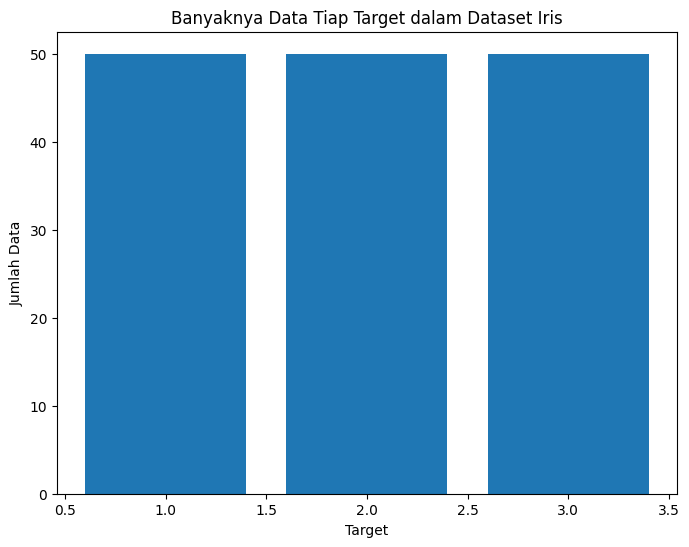

In [ ]:
# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(Y, return_counts=True)

# Membuat plot batang untuk menampilkan banyaknya data untuk tiap target
plt.figure(figsize=(8, 6))
plt.bar(unique_targets, target_counts)
plt.xlabel('Target')
plt.ylabel('Jumlah Data')
plt.title('Banyaknya Data Tiap Target dalam Dataset Iris')
plt.show()

In [ ]:
unique_targets, target_counts = np.unique(Y, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

{1: 50, 2: 50, 3: 50}


## 6. Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

resamp = RandomOverSampler()
balX, balY = resamp.fit_resample(X_pca, Y)

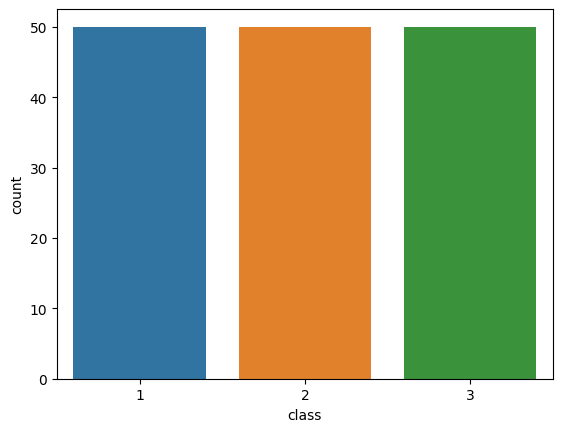

In [ ]:
sns.countplot(x=balY)
plt.show()

In [ ]:
unique_targets, target_counts = np.unique(balY, return_counts=True)
print(dict(zip(unique_targets, target_counts)))

{1: 50, 2: 50, 3: 50}


~ Memisahkan data train dan data test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(balX, balY, test_size=0.1, random_state=75)

In [ ]:
print(balX.shape, X_train.shape, X_test.shape)
print(balY.shape, Y_train.shape, Y_test.shape)

(150, 3) (135, 3) (15, 3)
(150,) (135,) (15,)
